In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("../DATA/tom-and-jerry.jpg")

In [2]:
road = cv2.imread("../DATA/road_image.jpg")

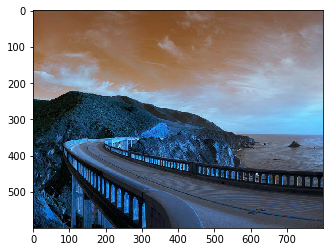

In [3]:
plt.imshow(road)

In [87]:
from matplotlib import cm

In [88]:
set2 = cm.Set2

In [89]:
set2.colors[0]

(0.4, 0.7607843137254902, 0.6470588235294118)

In [90]:
np.array(set2.colors[0])*255

array([102., 194., 165.])

In [91]:
x = np.array(set2.colors[0])*255

In [81]:
# x.astype('int32')

array([102, 194, 165])

In [92]:
# x = x.astype('int32')

In [93]:
x = [int(i) for i in x]

In [94]:
x

[102, 194, 165]

In [95]:
tuple(x)

(102, 194, 165)

In [96]:
def ret_rgb(colortup):
    x = np.array(colortup)*255
    x = [int(i) for i in x]
    return tuple(x)

In [97]:
colors = []

In [98]:
for color in set2.colors:
#     print(color)
    colors.append(ret_rgb(color))

In [99]:
colors

[(102, 194, 165),
 (252, 141, 98),
 (141, 160, 203),
 (231, 138, 195),
 (166, 216, 84),
 (255, 217, 47),
 (229, 196, 148),
 (179, 179, 179)]

In [100]:
colors[1]

(252, 141, 98)

In [108]:
demo = road.copy()

In [109]:
# rd, gn, bl = colors[1]

In [103]:
# type(rd)

int

In [104]:
# var = colors[1]

In [111]:
cv2.circle(demo,(200,400),10,colors[1],-1)

array([[[129,  83,  52],
        [130,  84,  53],
        [130,  84,  53],
        ...,
        [119,  97,  91],
        [119,  97,  92],
        [119,  97,  92]],

       [[129,  83,  52],
        [129,  83,  52],
        [130,  84,  53],
        ...,
        [121,  99,  94],
        [121,  99,  94],
        [121,  99,  94]],

       [[129,  83,  52],
        [129,  83,  52],
        [129,  83,  52],
        ...,
        [122, 100,  95],
        [122, 100,  95],
        [122, 100,  95]],

       ...,

       [[  2,   7,   8],
        [  9,  14,  15],
        [  1,   9,   9],
        ...,
        [ 55,  54,  58],
        [ 53,  52,  56],
        [ 51,  50,  54]],

       [[  0,   0,   0],
        [  5,   7,   7],
        [  4,   9,   8],
        ...,
        [ 51,  50,  54],
        [ 48,  47,  51],
        [ 49,  45,  50]],

       [[  2,   0,   0],
        [  8,   6,   6],
        [  5,   5,   5],
        ...,
        [ 53,  52,  56],
        [ 55,  54,  58],
        [ 58,  54,  59]]

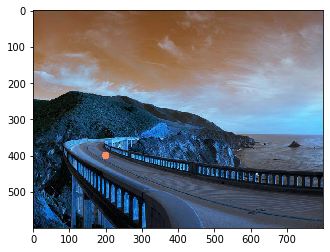

In [112]:
plt.imshow(demo)

In [26]:
markers = np.zeros(road.shape[:2],'int32')

In [27]:
segments = np.zeros(road.shape,'uint8')

In [33]:
len(colors)

8

In [39]:
chr(ord('A')).isdigit()

False

In [ ]:
roadcpy = road.copy()

In [29]:
ncol = len(colors)

In [30]:
marker_changed = False
colindx = 1

In [31]:
def clickFun(event,x,y,flag,params):
    global marker_changed,colindx
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(markers,(x,y),10,(colindx),-1)
        cv2.circle(roadcpy,(x,y),10,colors[colindex],-1)
        marker_changed = True

In [ ]:
cv2.namedWindow("Road Image")
cv2.setMouseCallback("Road Image",clickFun)

while True:
    cv2.imshow("Road Image",roadcpy)
    cv2.imshow("Road Segments",segments)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
    
    if k == ord('c'):
        roadcpy = road.copy()
        markers = np.zeros(road.shape[:2],'int32')
        segments = np.zeros(road.shape,'uint8')
        
    if k > 0 & chr(k).isdigit():
        num = int(chr(k))
        if num < ncol:
            colindx = num
            
    if marker_changed:
        markercpy = markers.copy()
        markercpy = cv2.watershed(road,markercpy)
        
        for i in range(colors):
            segments[markercpy == i] = colors[i]
        marker_changed = False
        
        
cv2.destroyAllWindows()

In [6]:
t = ('a','b','c')
x,y,z = t